In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t 
from sklearn.linear_model import LinearRegression


In [17]:
data = pd.read_csv('invest.txt', quotechar='"', delimiter =" ")
print(data)

    year     gnp  invest     cpi  interest
0   1968   873.4   133.3   82.54      5.16
1   1969   944.0   149.3   86.79      5.87
2   1970   992.7   144.2   91.45      5.95
3   1971  1077.6   166.4   96.01      4.88
4   1972  1185.9   195.0  100.00      4.50
5   1973  1326.4   229.8  105.75      6.44
6   1974  1434.2   228.7  115.08      7.83
7   1975  1549.2   206.1  125.79      6.25
8   1976  1718.0   257.9  132.34      5.50
9   1977  1918.3   324.1  140.05      5.46
10  1978  2163.9   386.6  150.42      7.46
11  1979  2417.8   423.0  163.42     10.28
12  1980  2633.1   402.3  178.64     11.77
13  1981  2937.7   471.5  195.51     13.42
14  1982  3057.5   421.9  207.23     11.02


In [18]:
print(data.columns)
print(data.columns.size)

Index(['year', 'gnp', 'invest', 'cpi', 'interest'], dtype='object')
5


In [22]:
data["gnp"] = np.log(data["gnp"])
data["invest"] = np.log(data["invest"])

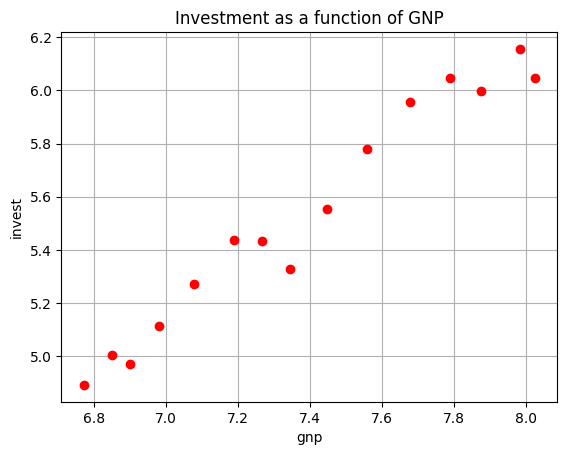

In [24]:
abscissa = data["gnp"]
ordinate = data["invest"]

plt.plot(abscissa, ordinate, 'ro')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.title("Investment as a function of GNP")
plt.grid()
plt.show()

In [26]:
gnp_mean = data["gnp"].mean()
invest_mean = data["invest"].mean()
beta_1 = np.sum((data["gnp"] - gnp_mean)*(data["invest"] - invest_mean))/np.sum((data["gnp"] - gnp_mean)**2)
beta0 = invest_mean - beta_1*gnp_mean
Y_est = beta0 + beta_1*data["gnp"]
R2 = 1 - np.sum((Y_est - data["invest"])**2)/ np.sum((data["invest"] - invest_mean)**2)
print("beta0 = ", beta0)
print("beta1 = ", beta_1)
print("Determination coefficient = ", R2)

beta0 =  -1.9635913352301815
beta1 =  1.015281401598871
Determination coefficient =  0.9627572956057855


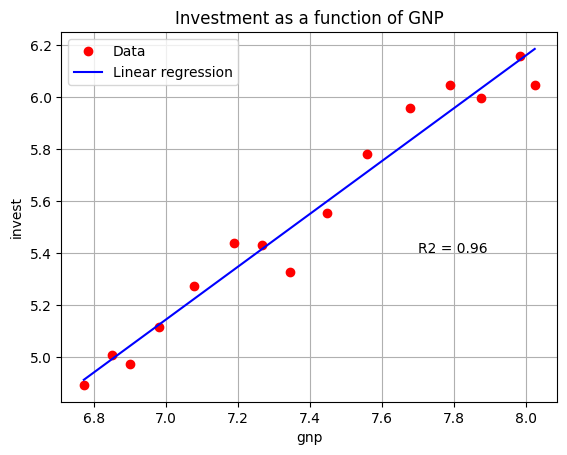

In [32]:
R2_truncated = f"{R2:.2f}"
plt.plot(abscissa, ordinate, 'ro')
plt.plot(abscissa, Y_est, 'b')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend(["Data", "Linear regression"])
plt.text(7.7, 5.4,"R2 = " + R2_truncated)
plt.title("Investment as a function of GNP")
plt.grid()
plt.show()

In [71]:
n = data["gnp"].size
t_quantile1 = t.ppf(0.975, n - 2)
print(t_quantile1)
sigma_est = 1/(n-2)*np.sum((data["invest"] - Y_est)**2)
print(sigma_est)

CI_high = Y_est + t_quantile1*np.sqrt(sigma_est)*np.sqrt(1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))
CI_low =Y_est - t_quantile1*np.sqrt(sigma_est)*np.sqrt(1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))

PI_high = Y_est + t_quantile1*np.sqrt(sigma_est)*np.sqrt(1 + 1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))

PI_low = Y_est - t_quantile1*np.sqrt(sigma_est)*np.sqrt(1 + 1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))




2.1603686564610127
0.0076763385554603995


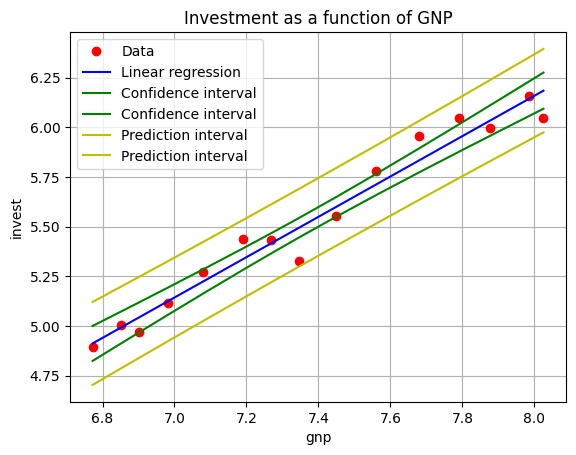

In [72]:
plt.figure()
plt.figsize=(40, 40)
plt.plot(abscissa, ordinate, 'ro')
plt.plot(abscissa, Y_est, 'b')
plt.plot(abscissa, CI_high, 'g')
plt.plot(abscissa, CI_low, 'g')
plt.plot(abscissa, PI_high, 'y')
plt.plot(abscissa, PI_low, 'y')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend(["Data", "Linear regression", "Confidence interval", "Confidence interval", "Prediction interval", "Prediction interval"])
plt.title("Investment as a function of GNP")
plt.grid()

In [55]:
p = 1

var_beta1 = sigma_est/np.sum((data["gnp"] - gnp_mean)**2)
#print(var_beta1)
#print(np.sqrt(var_beta1))
test = beta_1/np.sqrt(var_beta1)
print("test_statistic : ", test)

p_value = 2*(1 - t.cdf(test, n-(p + 1)))

print("p_value = ", p_value)










test_statistic :  18.331984456866678
p_value =  1.1363709973011282e-10


In [57]:
invest_1000 = beta0 + beta_1*np.log(1000)
print("Investment for GNP = 1000 : ", np.exp(invest_1000))



Investment for GNP = 1000 :  155.97942793105494


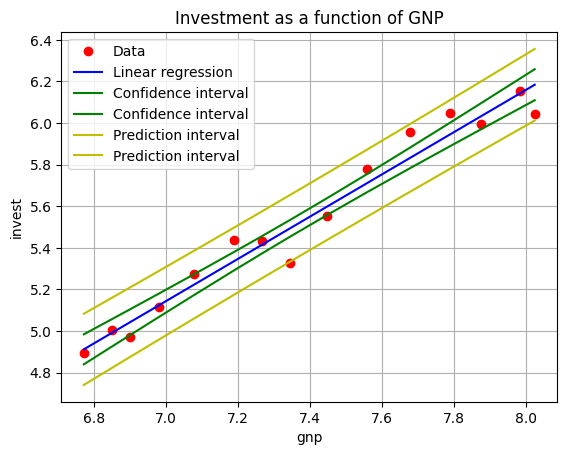

In [63]:
a = 0.1
t90 = t.ppf(1 - a/2, n - 2)

CI_high_90 = Y_est + t90*np.sqrt(sigma_est)*np.sqrt(1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))
CI_low_90 =Y_est - t90*np.sqrt(sigma_est)*np.sqrt(1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))

PI_high_90 = Y_est + t90*np.sqrt(sigma_est)*np.sqrt(1 + 1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))

PI_low_90 = Y_est - t90*np.sqrt(sigma_est)*np.sqrt(1 + 1/n +(data["gnp"]- gnp_mean)**2/np.sum((data["gnp"] - gnp_mean)**2))

plt.plot(abscissa, ordinate, 'ro')
plt.plot(abscissa, Y_est, 'b')
plt.plot(abscissa, CI_high_90, 'g')
plt.plot(abscissa, CI_low_90, 'g')
plt.plot(abscissa, PI_high_90, 'y')
plt.plot(abscissa, PI_low_90, 'y')
plt.xlabel("gnp")
plt.ylabel("invest")
plt.legend(["Data", "Linear regression", "Confidence interval", "Confidence interval", "Prediction interval", "Prediction interval"])
plt.title("Investment as a function of GNP")
plt.grid()





In [73]:
model = LinearRegression()
model.fit(data["gnp"].values.reshape(-1,1), data["invest"])
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(data["gnp"].values.reshape(-1,1), data["invest"])
print("slope : ", slope)
print("intercept : ", model.intercept_)
print(f"R^2: {r_squared:.4f}")

predicted_value = model.predict(np.array([[np.log(1000)]]))
print("Investment for GNP = 1000 : ", np.exp(predicted_value))

slope :  1.015281401598871
intercept :  -1.9635913352301815
R^2: 0.9628
Investment for GNP = 1000 :  [155.97942793]


In [78]:
A = np.array(data["gnp"]).reshape(-1,1)
B = np.array(data["interest"]).reshape(-1,1)
X = np.concatenate((A,B), axis = 1)
#print(X.shape)
Gram_matrix = A.T@A/n
print(Gram_matrix)
rank = np.linalg.matrix_rank(Gram_matrix)
print(rank)


[[54.68323179]]
1
